In [ ]:
#Descriptive Analytics using Python:Example:Bollywood data set

In [8]:
import pandas as pd
import numpy as np
mydata=pd.read_csv("bollywood.csv")
print(mydata.head().round(2))

   SlNo Release Date           MovieName ReleaseTime      Genre  Budget  \
0     1    18-Apr-14            2 States          LW    Romance      36   
1     2    04-Jan-13        Table No. 21           N  Thriller       10   
2     3    18-Jul-14  Amit Sahni Ki List           N     Comedy      10   
3     4    04-Jan-13    Rajdhani Express           N     Drama        7   
4     5    04-Jul-14        Bobby Jasoos           N     Comedy      18   

   BoxOfficeCollection  YoutubeViews  YoutubeLikes  YoutubeDislikes  
0               104.00       8576361         26622             2527  
1                12.00       1087320          1129              137  
2                 4.00        572336           586               54  
3                 0.35         42626            86               19  
4                10.80       3113427          4512             1224  


In [3]:
#Question1: How many records are present in the dataset? Print the metadata information of the dataset
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


In [157]:
#Question2: How many movies got released in each genre? which genre had highest number of releases?Sort number of releases in each genre in descending order
data1 = mydata.groupby(['Genre'])['Genre'].count()
print(df2)

data1_desc = data1.sort_values(ascending=False)
print(data1_desc)

print(data1_desc.head(1))


Genre
 Drama       35
Action       21
Action        3
Comedy       36
Romance      25
Thriller     26
Thriller      3
Name: Genre, dtype: int64
Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: Genre, dtype: int64
Genre
Comedy    36
Name: Genre, dtype: int64


In [53]:
#Question3: How many movies in each genre got released in different release times like long weekend, festival season etc
pd.crosstab(mydata.Genre, mydata.ReleaseTime, margins=True, margins_name="Total")

ReleaseTime,FS,HS,LW,N,Total
Genre,,,,,
Drama,4,6,1,24,35
Action,3,3,3,12,21
Action,0,0,0,3,3
Comedy,3,5,5,23,36
Romance,3,3,4,15,25
Thriller,4,1,1,20,26
Thriller,0,0,1,2,3
Total,17,18,15,99,149


In [103]:
#Question4: Which month of the year, maximum number movie releases are seen?
mydata['month'] = pd.DatetimeIndex(mydata['Release Date']).month
mydata['Table1'] = mydata.groupby('month')['MovieName'].count()
mydata[['month','Table1']].sort_values('Table1', ascending = False)[0:1]

,month,Table1
1,1,20.0


In [ ]:
#Question5: Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?


In [93]:
#Question6: Which are the top 10 movies with maximum return on investment (ROI)?
mydata['ROI'] = (mydata['BoxOfficeCollection']- mydata['Budget'])/mydata['Budget']
mydata[['MovieName','ROI']].sort_values('ROI', ascending = False)[0:10]

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


In [115]:
#Question7: Do the movies have higher ROI if they get released on festival seasons or long weekend?
mydata['ROI'] = (mydata['BoxOfficeCollection']- mydata['Budget'])/mydata['Budget']
Data2 = mydata.groupby("ReleaseTime")["ROI"].mean().reset_index()
print(Data2)

  ReleaseTime       ROI
0          FS  0.973853
1          HS  0.850867
2          LW  1.127205
3           N  0.657722


In [ ]:
#Yes, Movies with higher ROI got released on Long Weekend and next highest on festival seasons

In [116]:
import seaborn as sn
import matplotlib.pyplot as plt

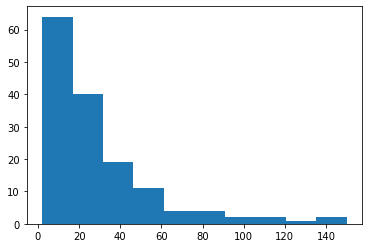

In [119]:
#Question8: Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies
plt.hist(mydata['Budget']);
plt.show()

C:\Users\nithy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


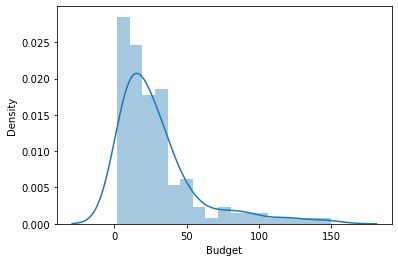

In [120]:
#Question8: Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies
sn.distplot(mydata['Budget']);
plt.show()

In [125]:
#Quetsion9: Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?
mydata['ROI'] = (mydata['BoxOfficeCollection']- mydata['Budget'])/mydata['Budget']
Data3 = mydata.groupby("Genre")["ROI"].mean().reset_index()
print(Data3)
#Drama genre movies have high ROI when compared to comedy genre

       Genre       ROI
0     Drama   1.357455
1     Action  0.431054
2    Action  -0.602028
3     Comedy  0.788394
4    Romance  1.003218
5   Thriller  0.169578
6  Thriller   0.421667


C:\Users\nithy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nithy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nithy\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


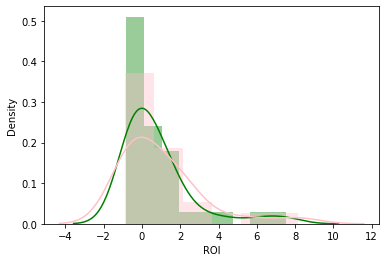

In [138]:
#Quetsion9: Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?
sn.distplot(mydata.ROI[mydata.Genre=="Comedy"],color="g",label="Comedy")
sn.distplot(mydata.ROI[mydata.Genre=="Drama"],color="r",label="Drama")
sn.distplot(mydata.ROI[mydata.Genre=="Romance"],color="pink",label="Romance");
plt.show();

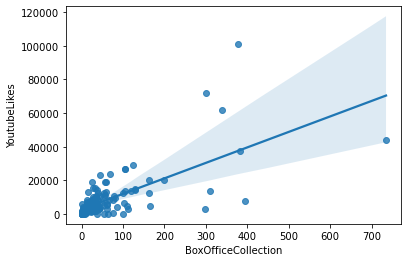

In [151]:
#Question10: Is there a correlation between box office collection and youtube likes? Is the correlation positive or negative?
sn.regplot(x = 'BoxOfficeCollection', y = 'YoutubeLikes', data = mydata);

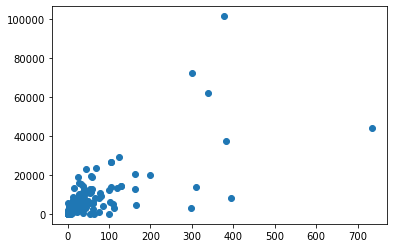

In [152]:
#Question10: Is there a correlation between box office collection and youtube likes? Is the correlation positive or negative?
plt.scatter(x = mydata.BoxOfficeCollection, y = mydata.YoutubeLikes);

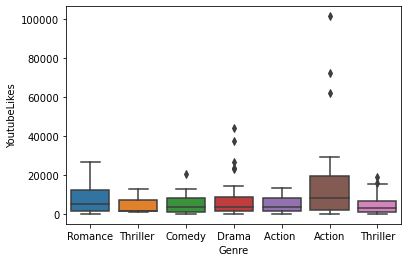

In [153]:
#Question11: Which genre of movies typically sees more youtube likes? Draw boxplots for each genre of movies to compare
sn.boxplot(x = 'Genre', y = 'YoutubeLikes', data = mydata);

C:\Users\nithy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


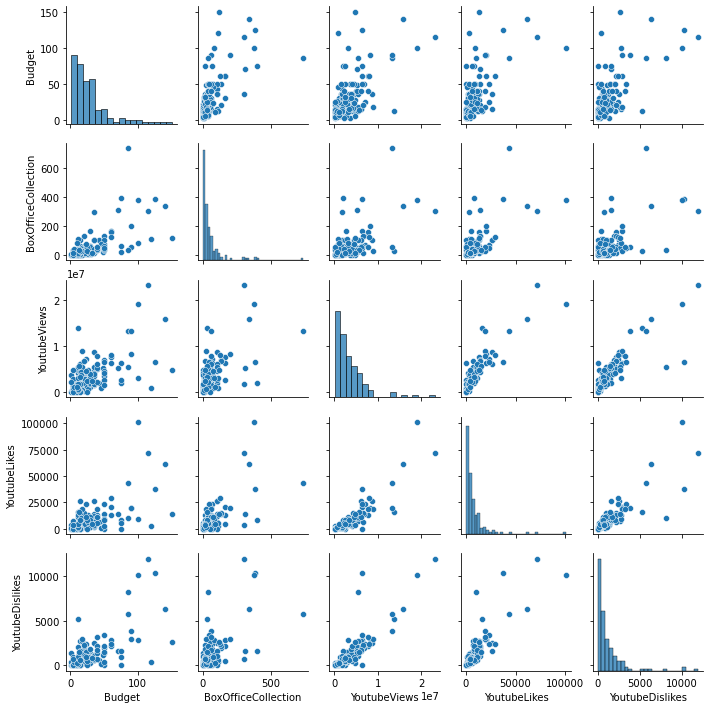

In [154]:
#Question12: Which of the variables among budget, box office collection, youtube view, youtubelikes, youtube dislikes are highly correlated? Note: Draw pair plot or heat map
Influential_features = ['Budget', 'BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']
sn.pairplot(mydata[Influential_features], size=2)

<AxesSubplot:>

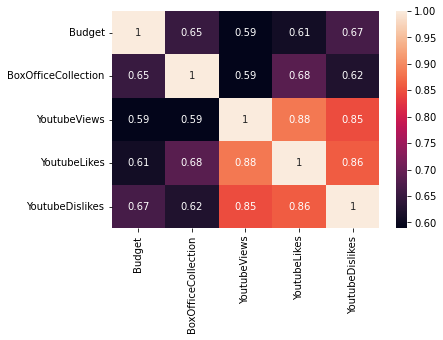

In [155]:
#Question12: Which of the variables among budget, box office collection, youtube view, youtubelikes, youtube dislikes are highly correlated? Note: Draw pair plot or heat map
Influential_features = ['Budget', 'BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']
mydata[Influential_features].corr()
sn.heatmap(mydata[Influential_features].corr(), annot=True)